<a href="https://colab.research.google.com/github/Ridargithub219/Deep-neural-network-Learning--Image-Classification-projects-Multiple/blob/main/Happy_people_sad_people_classification_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Install Dependencies and Setup

In [1]:
import shutil
zipfile = '/content/5c8e48f8-6e79-4d13-9fac-53a3ce59447c.zip'
unzip_to = '/content/data/happy'
shutil.unpack_archive(zipfile, unzip_to)

In [2]:
import shutil
zipfile = '/content/a29c6103-8428-4656-8cea-c5b9b715c394.zip'
unzip_to = '/content/data/sad'
shutil.unpack_archive(zipfile, unzip_to)

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [3]:
import cv2
import imghdr

In [4]:
data_dir = '/content/data'

In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [8]:
import os
os.listdir('/content/data')

['sad', 'happy']

In [9]:
os.listdir(os.path.join(data_dir,'happy'))

['vector11.svg',
 'images24.jpg',
 'image10.jpeg',
 'smiling-face-young-man-closeup-portrait-male-expressing-his-feeling-30783674.jpg',
 '7268969-portrait-of-happy-smiling-man-isolated-on-white.jpg',
 'images27.jpg',
 'AGvuzYZQQZ5IkXfIiZshgL2Ro93nSphfo0NezCuvI0wt6ws64-c-mo.jpg',
 'vector6.svg',
 '171120-smile-stock-njs-333p.jpg',
 'images32.jpg',
 'GettyImages-1142094003.jpg',
 'd-successful-happy-businessman-doing-hand-gesture-great-success_482257-39727.jpg',
 'png-transparent-thumb-signal-man-smile-happiness-shows-miscellaneous-microphone-hand.png',
 'pngtree-cartoon-person-smiling-man-vector-image-png-image_4053962.png',
 '340-3400291_smiling-person-png-man-with-arms-crossed-png.png',
 'Friends-at-an-Event-1-1.jpg',
 'image28.jpeg',
 'are-smiles-truly-attractive-1546622861.jpg',
 'vector14.svg',
 'diverse-group.jpg',
 'images26.jpg',
 'Screenshot-2022-10-20-at-16.58.26.png',
 'tive-man-happy-face-human-emotion-expression-having-fun-joy-camera-152138665.jpg',
 'appy-face-human-emotio

In [10]:
os.listdir(os.path.join(data_dir,'sad'))

['vector11.svg',
 'images24.jpg',
 'image10.jpeg',
 'images38.jpg',
 'image33.jpg',
 'man-with-head-down-300x300.jpg',
 'images27.jpg',
 'AGvuzYZQQZ5IkXfIiZshgL2Ro93nSphfo0NezCuvI0wt6ws64-c-mo.jpg',
 'image32.png',
 'vector6.svg',
 'images32.jpg',
 'anxious-man-indoors-front-view_23-2149729600.jpg',
 'dreamstime_m_169987253.jpg',
 'b2ap3_large_happy-sad-unsplash-850x575.jpg',
 'kTKBe9kBc.png',
 'image28.jpeg',
 'vector14.svg',
 'images26.jpg',
 'vector10.svg',
 'image21.jpeg',
 'images30.jpg',
 'sadness.jpg',
 'silhouettes-of-a-sad-man-with-the-background-of-the-sunset-sky-free-video.jpg',
 'image13.jpeg',
 'vector3.svg',
 'images4.jpg',
 'vector9.svg',
 'images15.jpg',
 'images18.jpg',
 'nal-man-digital-illustration-transparent-background-person-sitting-thumbnail.png',
 'dreamstime_s_101440985.jpg',
 'lonely-depressed-person-sitting-near-brick-wall_181624-30778.jpg',
 'image-asset.jpeg',
 'getty_501650894_118886.jpg',
 'all-those-people-who-are-sad-17573-1.jpg',
 'crying-on-steps-e150

In [11]:
for image_class in os.listdir(data_dir):
  print(image_class)

sad
happy


In [12]:
for image_class in os.listdir(data_dir): #REMOVING ALL DODGY OR BAD IMAGES
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/data/sad/vector11.svg
Image not in ext list /content/data/sad/vector6.svg
Image not in ext list /content/data/sad/vector14.svg
Image not in ext list /content/data/sad/vector10.svg
Image not in ext list /content/data/sad/vector3.svg
Image not in ext list /content/data/sad/vector9.svg
Image not in ext list /content/data/sad/vector7.svg
Image not in ext list /content/data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list /content/data/sad/sad-serious-illness-womandepressed-emotion-260nw-1810793920.jpg
Image not in ext list /content/data/sad/vector15.svg
Image not in ext list /content/data/sad/sad-people-love-the-rain.jpg.webp
Image not in ext list /content/data/sad/vector2.svg
Image not in ext list /content/data/sad/50740738-sad-people-s-portraits.jpg
Image not in ext list /content/data/sad/vector16.svg
Image not in ext list /content/data/sad/vector13.svg
Image not in ext list /content/data/sad/vector5.svg
Image not in ext list /content/data

In [13]:
os.remove(image_path)

In [21]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img=cv2.imread(os.path.join('/content/data','/content/data/happy','/content/data/happy/1000_F_243117659_eNEhNakRBBdwMIJo1y0XF3TFahMVdvT8.jpg'))

In [15]:
img.shape

(667, 1000, 3)

In [80]:
img = cv2.imread('/content/data/happy/171120-smile-stock-njs-333p.jpg',cv2.COLOR_)
plt.imshow(img)
plt.show()

AttributeError: ignored

# 3. Load Data

In [26]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [27]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 290 files belonging to 2 classes.


In [28]:
data_iterator = data.as_numpy_iterator()

In [29]:
batch = data_iterator.next()

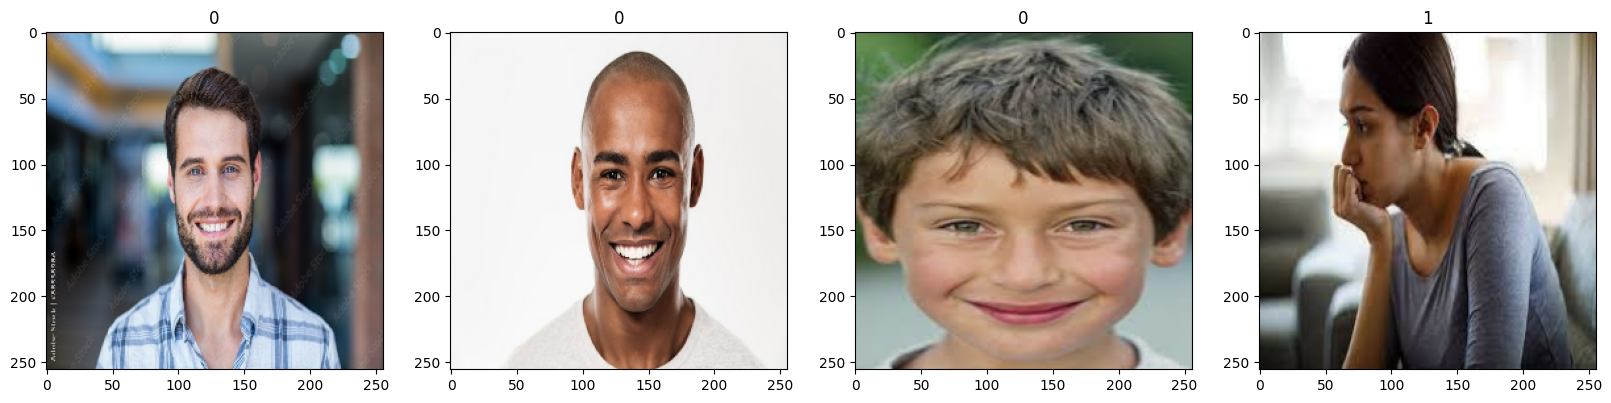

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
data.as_numpy_iterator().next()

(array([[[[3.71513098e-01, 3.71513098e-01, 3.71513098e-01],
          [3.38260174e-01, 3.38260174e-01, 3.38260174e-01],
          [3.87323827e-01, 3.87323827e-01, 3.87323827e-01],
          ...,
          [2.69226789e-01, 2.69226789e-01, 2.69226789e-01],
          [2.17788756e-01, 2.17788756e-01, 2.17788756e-01],
          [2.45410159e-01, 2.45410159e-01, 2.45410159e-01]],
 
         [[3.59365433e-01, 3.59365433e-01, 3.59365433e-01],
          [4.16241586e-01, 4.16241586e-01, 4.16241586e-01],
          [4.70473349e-01, 4.70473349e-01, 4.70473349e-01],
          ...,
          [3.11249614e-01, 3.11249614e-01, 3.11249614e-01],
          [3.82113576e-01, 3.82113576e-01, 3.82113576e-01],
          [3.62431079e-01, 3.62431079e-01, 3.62431079e-01]],
 
         [[3.80395979e-01, 3.80395979e-01, 3.80395979e-01],
          [4.83270139e-01, 4.83270139e-01, 4.83270139e-01],
          [5.13116598e-01, 5.13116598e-01, 5.13116598e-01],
          ...,
          [3.12153429e-01, 3.12153429e-01, 3.1215

# 5. Split Data

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [34]:
train_size

7

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [36]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [42]:
logdir='logs'

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [44]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 19s 713ms/step - loss: 2.4669 - accuracy: 0.5089 - val_loss: 1.0102 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 7s 770ms/step - loss: 0.7166 - accuracy: 0.5938 - val_loss: 0.6742 - val_accuracy: 0.5625
Epoch 3/20
7/7 [==============================] - 7s 564ms/step - loss: 0.6269 - accuracy: 0.7188 - val_loss: 0.5861 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 8s 902ms/step - loss: 0.5135 - accuracy: 0.7366 - val_loss: 0.6196 - val_accuracy: 0.6719
Epoch 5/20
7/7 [==============================] - 6s 512ms/step - loss: 0.5082 - accuracy: 0.7545 - val_loss: 0.3621 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 6s 502ms/step - loss: 0.4458 - accuracy: 0.8080 - val_loss: 0.4821 - val_accuracy: 0.7812
Epoch 7/20
7/7 [==============================] - 7s 674ms/step - loss: 0.3723 - accuracy: 0.8527 - val_loss: 0.3060 - val_accuracy: 0.8906
Epoch 8/20
7/7 [===

# 8. Plot Performance

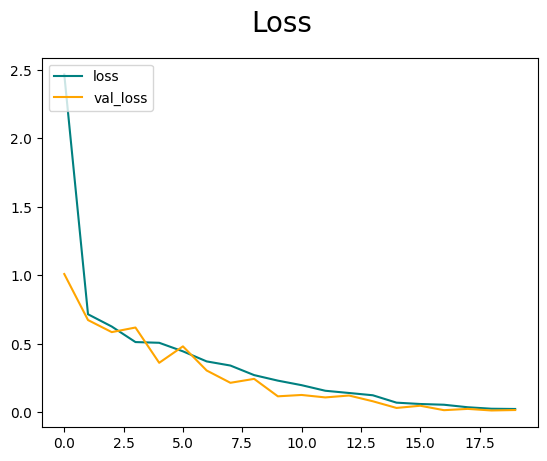

In [45]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

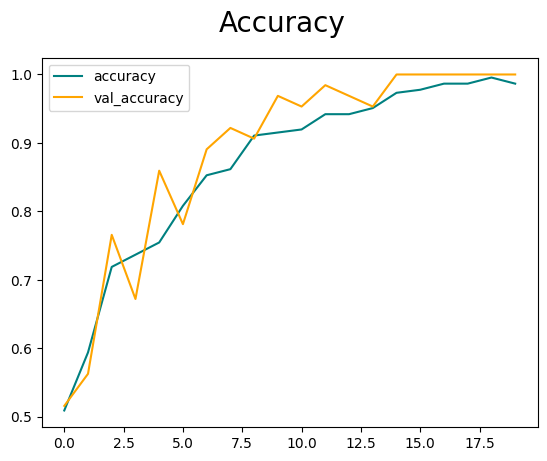

In [46]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [47]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 242ms/step


In [50]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [52]:
import cv2

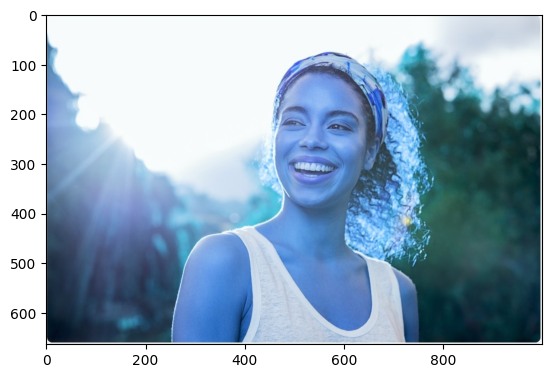

In [58]:
img = cv2.imread('/content/data/happy/By_Rido.jpg')
plt.imshow(img)
plt.show()

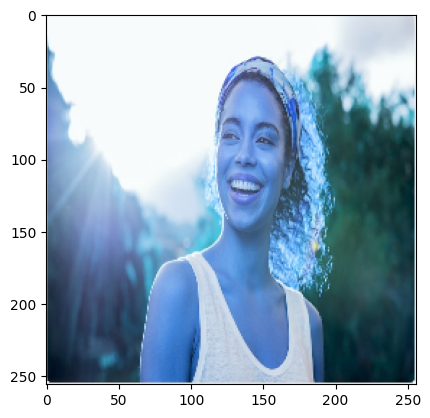

In [59]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [61]:
yhat

array([[0.25198153]], dtype=float32)

In [62]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


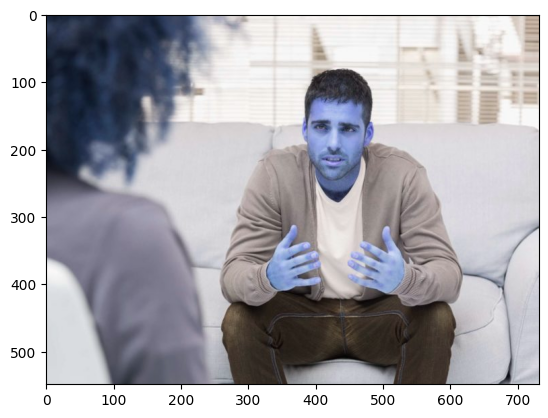

In [63]:
img = cv2.imread('/content/data/sad/314071_2200-732x549.jpg')
plt.imshow(img)
plt.show()

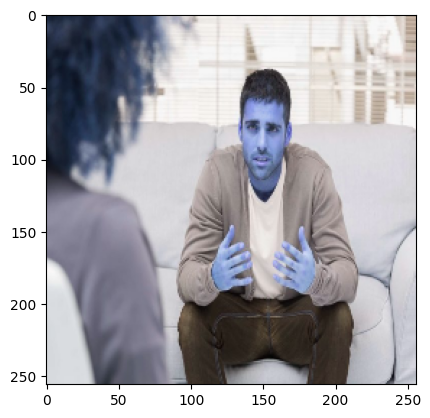

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [66]:
yhat

array([[0.9996848]], dtype=float32)

In [67]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [68]:
from tensorflow.keras.models import load_model

In [69]:
model.save(os.path.join('models','imageclassifier.h5'))

In [73]:
new_model = load_model('/content/models/imageclassifier.h5')

In [74]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 78ms/step


array([[0.9996848]], dtype=float32)